In [116]:
import os
import numpy as np
import pandas as pd
from io import StringIO

In [92]:
dataset_name = 'pamp2'
output_dir = f'./../../processed/{dataset_name}/'
os.makedirs(output_dir, exist_ok=True)
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')

In [93]:
imu_sensors = ['hand', 'chest', 'ankle']
imu_features = ['temperature (c)', 'x-acc16g', 'y-acc16g', 'z-acc16g', 'x-acc6g', 'y-acc6g', 'z-acc6g', 'x-gyro', 'y-gyro', 'z-gyro', 'x-mag', 'y-mag', 'z-mag', 'orientation1', 'orientation2', 'orientation3', 'orientation4']
all_imu_features = [f'{sensor}_{feature}' for sensor in imu_sensors for feature in imu_features]
features = ['timestamp', 'activity_id', 'heart_rate'] + all_imu_features

In [94]:
input_files = [os.path.join('Protocol', i) for i in os.listdir('Protocol') if i.endswith('.dat')]
input_files

['Protocol/subject108.dat',
 'Protocol/subject109.dat',
 'Protocol/subject107.dat',
 'Protocol/subject106.dat',
 'Protocol/subject104.dat',
 'Protocol/subject105.dat',
 'Protocol/subject101.dat',
 'Protocol/subject102.dat',
 'Protocol/subject103.dat']

In [95]:
dfs = []
for file in input_files:
    with open(file, 'r') as f:
        lines = f.readlines()

    data_str = '\n'.join(lines)
    data_io = StringIO(data_str)
    df = pd.read_csv(data_io, sep=" ", header=None)
    df.columns = features
    

    orientation_features = [i for i in df.columns if 'orientation' in i]
    df.drop(columns=orientation_features, inplace=True)

    acc6g_features = [i for i in df.columns if 'acc6g' in i]
    df.drop(columns=acc6g_features, inplace=True)

    df.bfill(inplace=True)

    subject_id = int(file.split('/')[1].split('.')[0].split('subject')[1][-1])
    df.insert(0, 'subject_id', subject_id)
    dfs.append(df)


In [98]:
data = pd.concat(dfs)
data.sort_values(by=['subject_id', 'timestamp'], inplace=True)

In [103]:
data = data[data['activity_id'] != 0]

In [104]:
data

,subject_id,timestamp,activity_id,heart_rate,hand_temperature (c),hand_x-acc16g,hand_y-acc16g,hand_z-acc16g,hand_x-gyro,hand_y-gyro,...,ankle_temperature (c),ankle_x-acc16g,ankle_y-acc16g,ankle_z-acc16g,ankle_x-gyro,ankle_y-gyro,ankle_z-gyro,ankle_x-mag,ankle_y-mag,ankle_z-mag
2928,1,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,...,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600
2929,1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,...,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600
2930,1,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,...,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900
2931,1,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,...,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900
2932,1,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,...,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959,9,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,-0.289166,-0.110170,...,31.50,9.40727,-2.24401,-2.259740,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139
7960,9,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,-0.275411,-0.128358,...,31.50,9.36745,-2.28110,-2.337100,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134
7961,9,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,-0.289885,-0.126548,...,31.50,9.36765,-2.24313,-2.337340,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438
7962,9,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,-0.234417,-0.101485,...,31.50,9.44470,-2.24425,-2.259360,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109


In [133]:
data[data['subject_id'] == 9]

,subject_id,timestamp,activity_id,heart_rate,hand_temperature (c),hand_x-acc16g,hand_y-acc16g,hand_z-acc16g,hand_x-gyro,hand_y-gyro,...,ankle_temperature (c),ankle_x-acc16g,ankle_y-acc16g,ankle_z-acc16g,ankle_x-gyro,ankle_y-gyro,ankle_z-gyro,ankle_x-mag,ankle_y-mag,ankle_z-mag
1573,9,31.20,24,139.0,24.875,-9.02648,3.43661,1.54825,0.555154,-0.151351,...,31.3125,6.10403,0.984611,-4.55185,-0.101032,-0.057742,-0.248516,-41.8305,-16.076200,5.251080
1574,9,31.21,24,139.0,24.875,-9.03504,3.35872,1.31746,0.446266,-0.032756,...,31.3125,5.72218,-1.112940,-3.11494,-0.205677,-0.029978,0.074442,-41.4590,-15.838900,4.684780
1575,9,31.22,24,139.0,24.875,-9.05919,3.58967,1.66270,0.381105,0.069561,...,31.3125,5.29642,-1.915460,-2.14958,-0.280073,0.034477,0.431696,-42.1015,-15.548900,4.824020
1576,9,31.23,24,139.0,24.875,-9.09083,3.70512,1.81579,0.253884,0.168181,...,31.3125,4.45626,-2.171530,-2.69686,-0.240229,0.088297,0.643419,-41.7191,-15.827200,4.258360
1577,9,31.24,24,139.0,24.875,-9.12301,3.93405,1.93000,0.105799,0.288910,...,31.3125,5.74280,-1.385140,-2.34124,0.123370,0.043536,0.780235,-42.2335,-15.414000,4.681560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959,9,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,-0.289166,-0.110170,...,31.5000,9.40727,-2.244010,-2.25974,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139
7960,9,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,-0.275411,-0.128358,...,31.5000,9.36745,-2.281100,-2.33710,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134
7961,9,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,-0.289885,-0.126548,...,31.5000,9.36765,-2.243130,-2.33734,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438
7962,9,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,-0.234417,-0.101485,...,31.5000,9.44470,-2.244250,-2.25936,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109


In [140]:
data

,subject_id,timestamp,activity_id,heart_rate,hand_temperature (c),hand_x-acc16g,hand_y-acc16g,hand_z-acc16g,hand_x-gyro,hand_y-gyro,...,ankle_temperature (c),ankle_x-acc16g,ankle_y-acc16g,ankle_z-acc16g,ankle_x-gyro,ankle_y-gyro,ankle_z-gyro,ankle_x-mag,ankle_y-mag,ankle_z-mag
2928,1,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,...,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600
2929,1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,...,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600
2930,1,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,...,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900
2931,1,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,...,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900
2932,1,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,...,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959,9,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,-0.289166,-0.110170,...,31.50,9.40727,-2.24401,-2.259740,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139
7960,9,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,-0.275411,-0.128358,...,31.50,9.36745,-2.28110,-2.337100,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134
7961,9,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,-0.289885,-0.126548,...,31.50,9.36765,-2.24313,-2.337340,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438
7962,9,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,-0.234417,-0.101485,...,31.50,9.44470,-2.24425,-2.259360,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109


<Axes: xlabel='subject_id'>

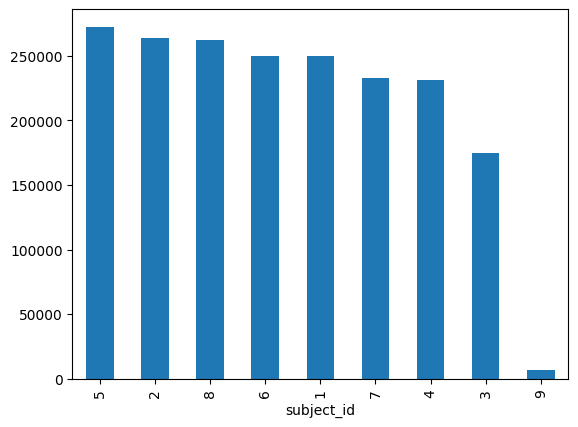

In [141]:
data['subject_id'].value_counts().plot(kind='bar')